In [8]:
print("""
@Description: 神经网络入门：分类与回归
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-07-28 21:08:32
@Hint: 运行此文件最少需要空余 9 GB 的内存，推荐使用 Colab
""")


@Description: 神经网络入门：分类与回归
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-07-28 21:08:32
@Hint: 运行此文件最少需要空余 9 GB 的内存，推荐使用 Colab



In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words = 10_000
)

In [3]:
print(train_data[0][:10])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
1


In [4]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for key, value in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# 对评论解码，索引减去了 3，因为0， 1， 2 分别是 padding、start of sequence、unknown
decoded_review[:50]

'? this film was just brilliant casting location sc'

In [6]:
import numpy as np
def vectorize_sequence(sequences, dimension=10_000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
x_val = x_train[:10_000]
partial_x_train = x_train[10_000:]
y_val = y_train[:10_000]
partial_y_train = y_train[10_000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 90ms/step - loss: 0.5284 - accuracy: 0.7764 - val_loss: 0.4249 - val_accuracy: 0.8347
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3237 - accuracy: 0.8932 - val_loss: 0.3139 - val_accuracy: 0.8831
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2440 - accuracy: 0.9177 - val_loss: 0.2835 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1972 - accuracy: 0.9355 - val_loss: 0.2806 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1629 - accuracy: 0.9469 - val_loss: 0.2755 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1440 - accuracy: 0.9528 - val_loss: 0.2825 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1219 - accuracy: 0.9619 - val_loss: 0.3125 - val_accuracy: 0.8795
Epoch 8/20
30

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
import matplotlib.pyplot as plt

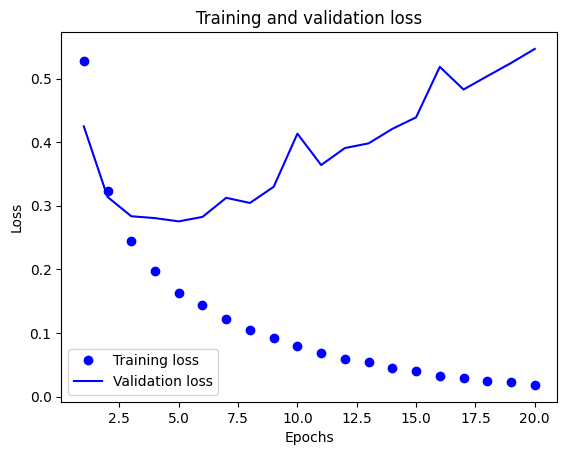

In [15]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


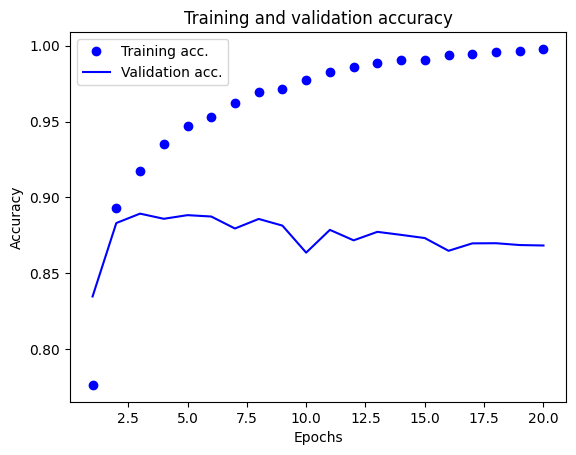

In [16]:
plt.clf() # 清空图像
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc.')
plt.plot(epochs, val_acc, 'b', label='Validation acc.')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'],)
model.fit(x_train,
          y_train,
          epochs=4,
          batch_size=512,)
results = model.evaluate(x_test, y_test)

In [ ]:
results

In [ ]:
model.predict(x_test)